In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid',palette='viridis')
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_csv(r'C:\Arif\PROJECT\Car_Price_Prediction\Car.csv')
df

,name,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner,60000
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner,135000
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner,600000
3,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner,250000
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner,450000
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,80000,Diesel,Individual,Manual,Second Owner,409999
4336,Hyundai i20 Magna 1.4 CRDi,2014,80000,Diesel,Individual,Manual,Second Owner,409999
4337,Maruti 800 AC BSIII,2009,83000,Petrol,Individual,Manual,Second Owner,110000
4338,Hyundai Creta 1.6 CRDi SX Option,2016,90000,Diesel,Individual,Manual,First Owner,865000


In [3]:
df1 = df.reset_index(drop = True)

In [4]:
df1.describe()

,year,km_driven,selling_price
count,4340.000000,4340.000000,4.340000e+03
mean,2013.090783,66215.777419,5.041273e+05
std,4.215344,46644.102194,5.785487e+05
min,1992.000000,1.000000,2.000000e+04
25%,2011.000000,35000.000000,2.087498e+05
50%,2014.000000,60000.000000,3.500000e+05
75%,2016.000000,90000.000000,6.000000e+05
max,2020.000000,806599.000000,8.900000e+06


In [5]:
df1.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner,60000
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner,135000
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner,600000
3,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner,250000
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner,450000


In [6]:
df1.tail()

,name,year,km_driven,fuel,seller_type,transmission,owner,selling_price
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,80000,Diesel,Individual,Manual,Second Owner,409999
4336,Hyundai i20 Magna 1.4 CRDi,2014,80000,Diesel,Individual,Manual,Second Owner,409999
4337,Maruti 800 AC BSIII,2009,83000,Petrol,Individual,Manual,Second Owner,110000
4338,Hyundai Creta 1.6 CRDi SX Option,2016,90000,Diesel,Individual,Manual,First Owner,865000
4339,Renault KWID RXT,2016,40000,Petrol,Individual,Manual,First Owner,225000


In [7]:
df1.dtypes

name             object
year              int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
selling_price     int64
dtype: object

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   km_driven      4340 non-null   int64 
 3   fuel           4340 non-null   object
 4   seller_type    4340 non-null   object
 5   transmission   4340 non-null   object
 6   owner          4340 non-null   object
 7   selling_price  4340 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [9]:
df1.isnull().sum()

name             0
year             0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
selling_price    0
dtype: int64

In [10]:
df1.rename(columns={'name':'Name','fuel':'Fuel_Type','owner':'Owner_Type'},inplace=True)

In [11]:
df1.rename(columns={'year':'Year','km_driven':'Km_Driven','seller_type':'Seller_Type','transmission':'Transmission'},inplace=True)

In [12]:
df1

,Name,Year,Km_Driven,Fuel_Type,Seller_Type,Transmission,Owner_Type,selling_price
0,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner,60000
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner,135000
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner,600000
3,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner,250000
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner,450000
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,80000,Diesel,Individual,Manual,Second Owner,409999
4336,Hyundai i20 Magna 1.4 CRDi,2014,80000,Diesel,Individual,Manual,Second Owner,409999
4337,Maruti 800 AC BSIII,2009,83000,Petrol,Individual,Manual,Second Owner,110000
4338,Hyundai Creta 1.6 CRDi SX Option,2016,90000,Diesel,Individual,Manual,First Owner,865000


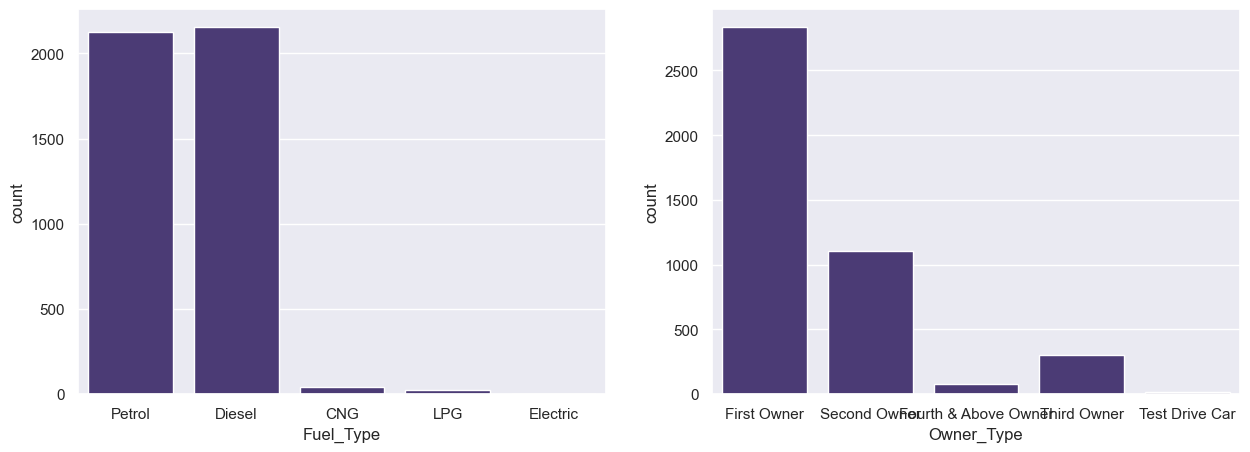

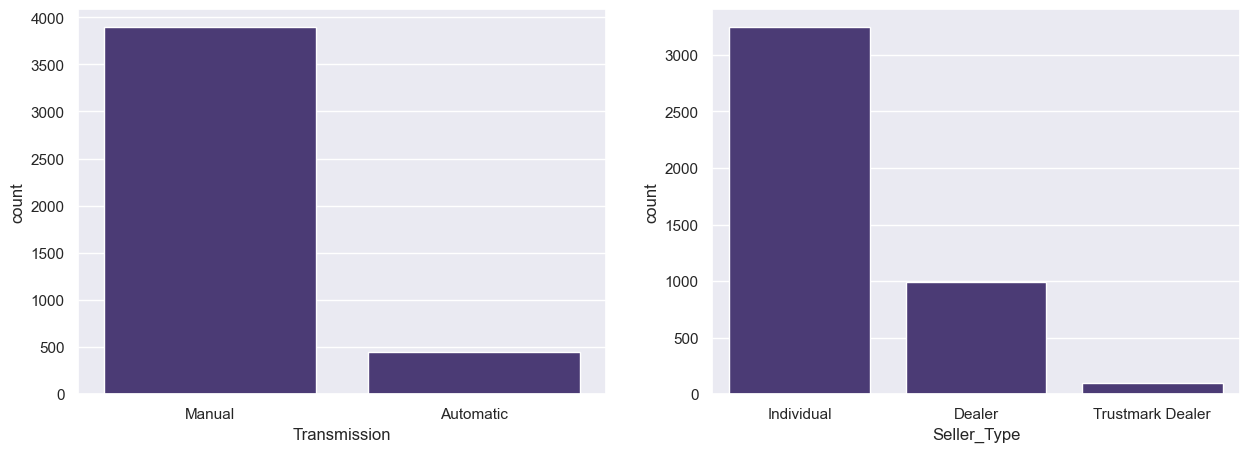

In [13]:
cols =['Fuel_Type','Owner_Type','Transmission','Seller_Type']
i=0
while i < 4:
    fig = plt.figure(figsize=[15,5])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(cat_cols[i])
    plt.subplot(1,2,1)
    sns.countplot(x=cols[i], data=df1)
    i += 1
    
    #ax2.title.set_text(cat_cols[i])
    plt.subplot(1,2,2)
    sns.countplot(x=cols[i], data=df1)
    i += 1
    
    plt.show()

([0, 1, 2],
 [Text(0, 0, 'Year'), Text(1, 0, 'Km_Driven'), Text(2, 0, 'selling_price')])

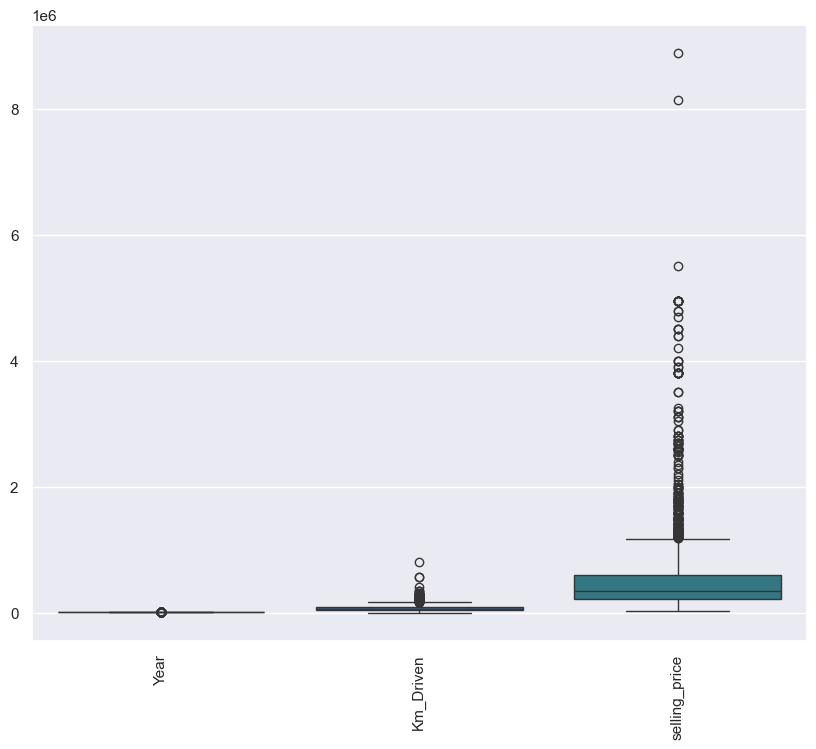

In [14]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df1)
plt.xticks(rotation=90)

In [15]:
def outlier_detection(data, columns):
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1
        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)
        df1[col] = np.where(df1[col] > upper, upper, np.where(df1[col] < lower, lower,df1[col]))

In [16]:
outlier_detection(df1,columns=['Year','Km_Driven','selling_price'])

([0, 1, 2],
 [Text(0, 0, 'Year'), Text(1, 0, 'Km_Driven'), Text(2, 0, 'selling_price')])

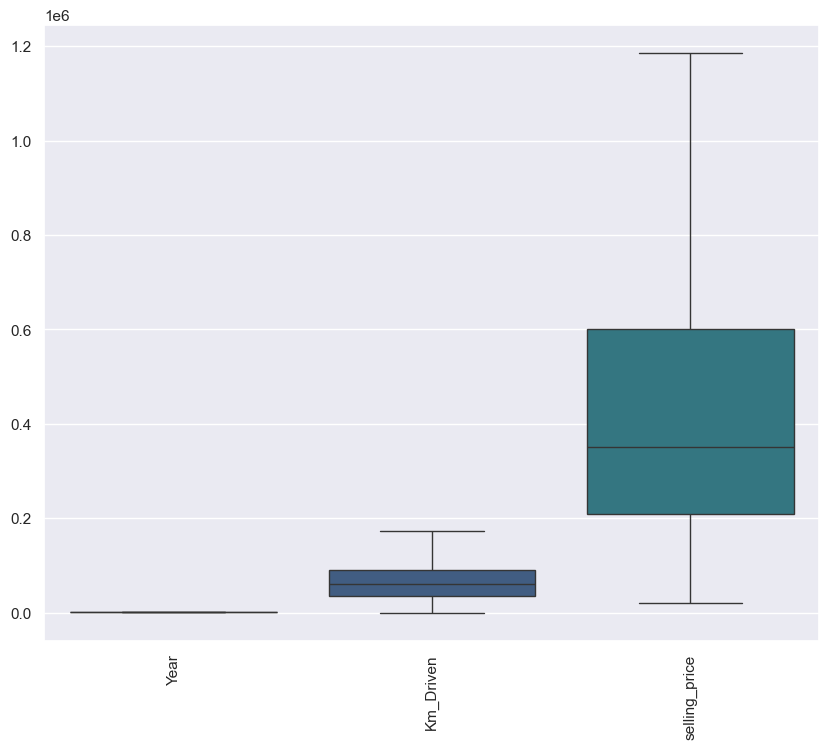

In [17]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df1)
plt.xticks(rotation=90)

In [18]:
#df1 = pd.get_dummies(df1,columns=['Name','Fuel_Type','seller_type','transmission','Owner_Type'])

In [19]:
x = df1.drop(columns='selling_price',axis=1)
y = df1['selling_price']

In [20]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [21]:
X_train

,Name,Year,Km_Driven,Fuel_Type,Seller_Type,Transmission,Owner_Type
3294,Maruti Swift Dzire AMT VDI,2018.0,50000.0,Diesel,Individual,Automatic,First Owner
2290,Honda City 1.5 V AT,2008.0,70000.0,Petrol,Individual,Automatic,First Owner
874,Maruti Alto 800 LXI,2017.0,50000.0,Petrol,Individual,Manual,First Owner
1907,Datsun GO T Petrol,2015.0,92198.0,Petrol,Dealer,Manual,Second Owner
3244,Hyundai EON Era Plus,2013.0,3240.0,Petrol,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...
2895,Maruti Zen Estilo LXI BSIII,2008.0,40000.0,Petrol,Individual,Manual,First Owner
2763,Hyundai Grand i10 1.2 Kappa Asta,2019.0,15000.0,Petrol,Individual,Manual,First Owner
905,Maruti Ertiga VXI,2015.0,11918.0,Petrol,Trustmark Dealer,Manual,First Owner
3980,Hyundai Creta 1.6 CRDi SX Option,2015.0,90000.0,Diesel,Individual,Manual,Second Owner


In [22]:
y_train

3294     675000.0
2290     140000.0
874      160000.0
1907     225000.0
3244     280000.0
          ...    
2895     105000.0
2763     500000.0
905      625000.0
3980    1025000.0
235      300000.0
Name: selling_price, Length: 3472, dtype: float64

In [23]:
df1.shape

(4340, 8)

In [24]:
transformer = ColumnTransformer(
    transformers=[
        ('tnf1', OneHotEncoder(handle_unknown='ignore'), [0,3,4,5,6]),
        ('tnf2', StandardScaler(), [1,2])
    ], remainder='passthrough')

In [25]:
model = Pipeline(steps=[('transformer', transformer),('model',AdaBoostRegressor(learning_rate=0.5))])

In [26]:
model

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [0, 3, 4, 5, 6]),
                                                 ('tnf2', StandardScaler(),
                                                  [1, 2])])),
                ('model', AdaBoostRegressor(learning_rate=0.5))])

In [27]:
model.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [0, 3, 4, 5, 6]),
                                                 ('tnf2', StandardScaler(),
                                                  [1, 2])])),
                ('model', AdaBoostRegressor(learning_rate=0.5))])

In [28]:
ypred = model.predict(X_test)
ypred

array([ 878269.95354137,  619468.82298714,  458572.39154653,
        462348.57325647,  626063.83577555,  224662.05490196,
        682295.4607438 ,  324215.31429856,  702790.28202847,
        446365.99245283,  711089.82789855,  462348.57325647,
        714187.70105042,  198293.43412744,  198293.43412744,
        224662.05490196,  441969.73428526,  446365.99245283,
        492117.55546805,  626063.83577555,  294914.94320138,
        700474.3282797 ,  224662.05490196,  529923.67615512,
        726219.42912828,  441969.73428526,  619468.82298714,
        672703.99365821,  711089.82789855,  324215.31429856,
        446365.99245283,  198293.43412744,  458572.39154653,
        822286.43958743,  702790.28202847,  458572.39154653,
        365516.47813411,  294914.94320138,  263900.01916667,
        529923.67615512,  365516.47813411,  224662.05490196,
        198293.43412744,  365516.47813411,  524214.56347352,
        682295.4607438 ,  508916.69534483,  458572.39154653,
        365516.47813411,

In [29]:
# Metrics calculation
mae = mean_absolute_error(y_test, ypred)
mse = mean_squared_error(y_test, ypred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, ypred)

# Results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 161810.56
Mean Squared Error (MSE): 38949627894.49
Root Mean Squared Error (RMSE): 197356.60
R² Score: 0.58


In [30]:
model1 = Pipeline(steps=[('transformer', transformer),('model',GradientBoostingRegressor(learning_rate=0.01))])
model1

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [0, 3, 4, 5, 6]),
                                                 ('tnf2', StandardScaler(),
                                                  [1, 2])])),
                ('model', GradientBoostingRegressor(learning_rate=0.01))])

In [31]:
model1.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [0, 3, 4, 5, 6]),
                                                 ('tnf2', StandardScaler(),
                                                  [1, 2])])),
                ('model', GradientBoostingRegressor(learning_rate=0.01))])

In [32]:
ypred = model1.predict(X_test)
ypred

array([659157.45771731, 472182.28867357, 370673.27607041, 450437.3435315 ,
       472182.28867357, 278822.06385443, 530168.32623825, 325603.99362951,
       580339.71275943, 439097.06517907, 607197.44317205, 424206.14293547,
       607197.44317205, 256340.62061132, 256340.62061132, 278822.06385443,
       393473.62540536, 439155.66034948, 433014.73004314, 472182.28867357,
       322882.93185832, 559443.78970455, 278822.06385443, 511668.26282544,
       635729.32862293, 393473.62540536, 472182.28867357, 530168.32623825,
       607197.44317205, 325603.99362951, 442372.25946972, 256340.62061132,
       370673.27607041, 659157.45771731, 559443.78970455, 370673.27607041,
       344973.41804469, 303122.5503864 , 298191.48826961, 511668.26282544,
       344973.41804469, 278822.06385443, 257619.37245663, 322882.93185832,
       456565.81200423, 530168.32623825, 477800.33504094, 370673.27607041,
       344973.41804469, 303122.5503864 , 530882.92016131, 607197.44317205,
       393473.62540536, 2

In [33]:
# Metrics calculation
mae = mean_absolute_error(y_test, ypred)
mse = mean_squared_error(y_test, ypred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, ypred)

# Results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 165447.57
Mean Squared Error (MSE): 44521083173.75
Root Mean Squared Error (RMSE): 211000.20
R² Score: 0.52


Since, We are getting same score for both the model we choose AdaBoostRegressor as final model

In [37]:
transformer = ColumnTransformer(
    transformers=[
        ('tnf1', OneHotEncoder(handle_unknown='ignore'), [0,3,4,5,6]),
        ('tnf2', StandardScaler(), [1,2])
    ], remainder='passthrough')

In [38]:
model = Pipeline(steps=[('transformer', transformer),('model',AdaBoostRegressor(learning_rate=0.5))])
model

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [0, 3, 4, 5, 6]),
                                                 ('tnf2', StandardScaler(),
                                                  [1, 2])])),
                ('model', AdaBoostRegressor(learning_rate=0.5))])

In [ ]:
import joblib
with open('car.pkl', 'wb') as f:
    joblib.dump(model, f)